In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('electricity_bill_dataset.csv')

In [3]:
df.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
0,16,23,2,6,1,0,10,Hyderabad,Tata Power Company Ltd.,384,8.4,3225.6
1,19,22,2,3,1,0,5,Vadodara,NHPC,488,7.8,3806.4
2,7,20,2,6,7,0,7,Shimla,Jyoti Structure,416,7.7,3203.2
3,7,22,3,21,1,0,6,Mumbai,Power Grid Corp,475,9.2,4370.0
4,11,23,2,11,1,0,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,9.2,4204.4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fan              45345 non-null  int64  
 1   Refrigerator     45345 non-null  int64  
 2   AirConditioner   45345 non-null  int64  
 3   Television       45345 non-null  int64  
 4   Monitor          45345 non-null  int64  
 5   MotorPump        45345 non-null  int64  
 6   Month            45345 non-null  int64  
 7   City             45345 non-null  object 
 8   Company          45345 non-null  object 
 9   MonthlyHours     45345 non-null  int64  
 10  TariffRate       45345 non-null  float64
 11  ElectricityBill  45345 non-null  float64
dtypes: float64(2), int64(8), object(2)
memory usage: 4.2+ MB


In [5]:
df.isna().sum()

Fan                0
Refrigerator       0
AirConditioner     0
Television         0
Monitor            0
MotorPump          0
Month              0
City               0
Company            0
MonthlyHours       0
TariffRate         0
ElectricityBill    0
dtype: int64

In [6]:
# print(df['City'].value_counts)
df['Company'].value_counts

<bound method IndexOpsMixin.value_counts of 0                                  Tata Power Company Ltd.
1                                                     NHPC
2                                          Jyoti Structure
3                                          Power Grid Corp
4                Ratnagiri Gas and Power Pvt. Ltd. (RGPPL)
                               ...                        
45340    Maha Transco – Maharashtra State Electricity T...
45341                                         Orient Green
45342                                 GE T&D India Limited
45343                                   TransRail Lighting
45344                      L&T Transmission & Distribution
Name: Company, Length: 45345, dtype: object>

In [7]:
# df['City'].unique()
df['Company'].unique()

array(['Tata Power Company Ltd.', 'NHPC', 'Jyoti Structure',
       'Power Grid Corp', 'Ratnagiri Gas and Power Pvt. Ltd. (RGPPL)',
       'Adani Power Ltd.', 'Kalpataru Power', 'Orient Green',
       'Sterlite Power Transmission Ltd',
       'Neueon Towers / Sujana Towers Ltd.', 'KEC International',
       'Indowind Energy', 'Unitech Power Transmission Ltd.',
       'Bonfiglioli Transmission Pvt. Ltd.', 'SJVN Ltd.',
       'Maha Transco – Maharashtra State Electricity Transmission Co, Ltd.',
       'L&T Transmission & Distribution', 'Guj Ind Power',
       'Torrent Power Ltd.', 'Reliance Energy', 'GE T&D India Limited',
       'NTPC Pvt. Ltd.',
       'Optibelt Power Transmission India Private Limited', 'CESC',
       'Ringfeder Power Transmission India Pvt. Ltd.', 'Reliance Power',
       'JSW Energy Ltd.', 'Sunil Hitech Eng',
       'Toshiba Transmission & Distribution Systems (India) Pvt. Ltd.',
       'Jaiprakash Power', 'TransRail Lighting', 'NLC India'],
      dtype=object)

In [8]:
from sklearn.preprocessing import LabelEncoder
le_city=LabelEncoder()
le_company=LabelEncoder()

In [9]:
df['City']=le_city.fit_transform(df['City'])
df['Company']=le_company.fit_transform(df['Company'])

In [10]:
df.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
0,16,23,2,6,1,0,10,5,27,384,8.4,3225.6
1,19,22,2,3,1,0,5,15,13,488,7.8,3806.4
2,7,20,2,6,7,0,7,14,8,416,7.7,3203.2
3,7,22,3,21,1,0,6,7,19,475,9.2,4370.0
4,11,23,2,11,1,0,2,7,20,457,9.2,4204.4


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fan              45345 non-null  int64  
 1   Refrigerator     45345 non-null  int64  
 2   AirConditioner   45345 non-null  int64  
 3   Television       45345 non-null  int64  
 4   Monitor          45345 non-null  int64  
 5   MotorPump        45345 non-null  int64  
 6   Month            45345 non-null  int64  
 7   City             45345 non-null  int64  
 8   Company          45345 non-null  int64  
 9   MonthlyHours     45345 non-null  int64  
 10  TariffRate       45345 non-null  float64
 11  ElectricityBill  45345 non-null  float64
dtypes: float64(2), int64(10)
memory usage: 4.2 MB


In [12]:
df.drop('MotorPump',axis=1,inplace=True)
df.drop('TariffRate',axis=1,inplace=True)

<Axes: >

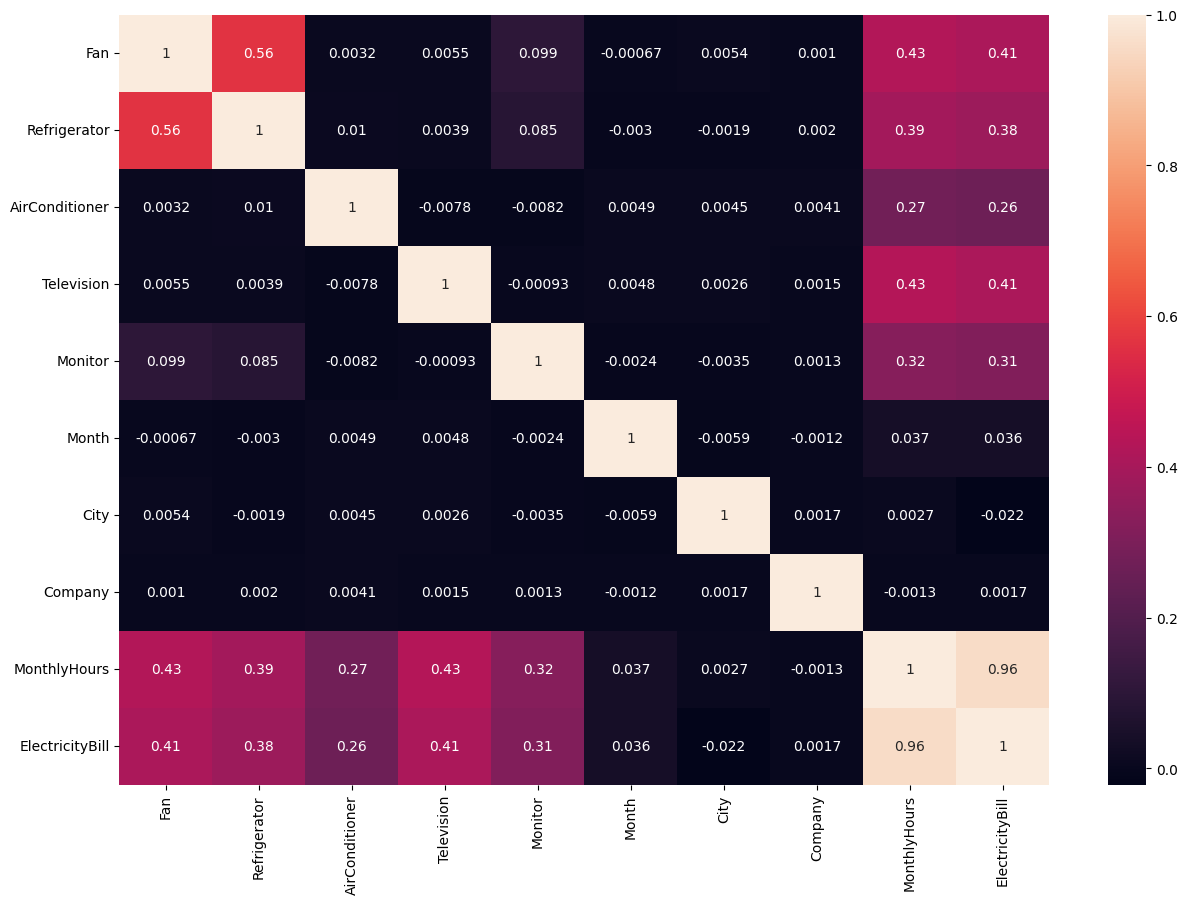

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)


In [14]:
X=df.drop('ElectricityBill',axis=True)
y=df['ElectricityBill']

In [15]:
X.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,Month,City,Company,MonthlyHours
0,16,23,2,6,1,10,5,27,384
1,19,22,2,3,1,5,15,13,488
2,7,20,2,6,7,7,14,8,416
3,7,22,3,21,1,6,7,19,475
4,11,23,2,11,1,2,7,20,457


In [16]:
y.head()

0    3225.6
1    3806.4
2    3203.2
3    4370.0
4    4204.4
Name: ElectricityBill, dtype: float64

In [17]:
X.corr()

,Fan,Refrigerator,AirConditioner,Television,Monitor,Month,City,Company,MonthlyHours
Fan,1.000000,0.563139,0.003201,0.005547,0.098622,-0.000672,0.005350,0.000999,0.426497
Refrigerator,0.563139,1.000000,0.010282,0.003906,0.085030,-0.002973,-0.001921,0.001971,0.392823
AirConditioner,0.003201,0.010282,1.000000,-0.007846,-0.008240,0.004880,0.004487,0.004119,0.273721
Television,0.005547,0.003906,-0.007846,1.000000,-0.000930,0.004757,0.002586,0.001550,0.429737
Monitor,0.098622,0.085030,-0.008240,-0.000930,1.000000,-0.002397,-0.003502,0.001347,0.324485
Month,-0.000672,-0.002973,0.004880,0.004757,-0.002397,1.000000,-0.005878,-0.001192,0.037002
City,0.005350,-0.001921,0.004487,0.002586,-0.003502,-0.005878,1.000000,0.001695,0.002711
Company,0.000999,0.001971,0.004119,0.001550,0.001347,-0.001192,0.001695,1.000000,-0.001291
MonthlyHours,0.426497,0.392823,0.273721,0.429737,0.324485,0.037002,0.002711,-0.001291,1.000000


In [18]:
cols=list(X.columns)
cols

['Fan',
 'Refrigerator',
 'AirConditioner',
 'Television',
 'Monitor',
 'Month',
 'City',
 'Company',
 'MonthlyHours']

In [19]:
# for i in cos:
#     plt.figure(figsize=(5,3))
#     sns.boxplot(X[i])
#     plt.showl()

In [20]:
X.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,Month,City,Company,MonthlyHours
0,16,23,2,6,1,10,5,27,384
1,19,22,2,3,1,5,15,13,488
2,7,20,2,6,7,7,14,8,416
3,7,22,3,21,1,6,7,19,475
4,11,23,2,11,1,2,7,20,457


In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
X_train.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,Month,City,Company,MonthlyHours
12362,8,22,1,12,1,9,4,13,512
26357,21,23,3,11,12,2,11,15,577
22319,18,22,1,12,12,1,12,20,514
32505,22,22,1,3,1,10,14,3,565
43651,6,20,2,20,7,4,13,4,429


In [23]:
X_test.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,Month,City,Company,MonthlyHours
19060,13,23,1,11,12,4,6,4,581
17874,16,22,2,11,1,9,8,28,428
44423,6,17,1,21,1,2,4,25,391
36865,11,22,2,12,12,1,5,16,682
36537,15,22,3,12,1,10,10,11,488


In [24]:
X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)

In [25]:
X_train.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,Month,City,Company,MonthlyHours
0,8,22,1,12,1,9,4,13,512
1,21,23,3,11,12,2,11,15,577
2,18,22,1,12,12,1,12,20,514
3,22,22,1,3,1,10,14,3,565
4,6,20,2,20,7,4,13,4,429


In [26]:
X_test.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,Month,City,Company,MonthlyHours
0,13,23,1,11,12,4,6,4,581
1,16,22,2,11,1,9,8,28,428
2,6,17,1,21,1,2,4,25,391
3,11,22,2,12,12,1,5,16,682
4,15,22,3,12,1,10,10,11,488


In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(36276, 9)
(9069, 9)
(36276,)
(9069,)


In [28]:
cols=list(X_train.columns)
cols

['Fan',
 'Refrigerator',
 'AirConditioner',
 'Television',
 'Monitor',
 'Month',
 'City',
 'Company',
 'MonthlyHours']

In [29]:
for i in cols:
    print(i)
    print(np.min(X_train[i]))
    print(np.max(X_train[i]))

Fan
5
23
Refrigerator
17
23
AirConditioner
0
3
Television
3
22
Monitor
1
12
Month
1
12
City
0
15
Company
0
31
MonthlyHours
95
924


In [30]:
print(np.min(X_train['MonthlyHours']))
print(np.max(X_train['MonthlyHours']))

95
924


In [31]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
outliers=['Refrigerator','MonthlyHours']
X_train.loc[:,outliers]=scaler.fit_transform(X_train[outliers])
X_test.loc[:,outliers]=scaler.transform(X_test[outliers])

C:\Users\nalla\AppData\Local\Temp\ipykernel_6420\797507843.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.17717352 0.77438099 0.17717352 ... 0.17717352 0.17717352 0.17717352]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:,outliers]=scaler.fit_transform(X_train[outliers])
C:\Users\nalla\AppData\Local\Temp\ipykernel_6420\797507843.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.02567756  0.50347017 -0.00939609 ...  2.43282422  0.90236616
  0.9349291 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:,outliers]=scaler.fit_transform(X_train[outliers])
C:\Users\nalla\AppData\Local\Temp\ipykernel_6420\797507843.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas.

In [32]:
X_train.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,Month,City,Company,MonthlyHours
0,8,0.177174,1,12,1,9,4,13,-0.025678
1,21,0.774381,3,11,12,2,11,15,0.503470
2,18,0.177174,1,12,12,1,12,20,-0.009396
3,22,0.177174,1,3,1,10,14,3,0.405781
4,6,-1.017241,2,20,7,4,13,4,-0.701359


In [33]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [34]:
models=[LinearRegression,Ridge,Lasso,DecisionTreeRegressor,RandomForestRegressor,XGBRegressor]
print_vals=[]
for i in models:
    mod=i()
    mod.fit(X_train,y_train)
    y_pred=mod.predict(X_test)
    mae=(mean_absolute_error(y_test,y_pred))
    mse=(mean_squared_error(y_test,y_pred))
    r2=(r2_score(y_test,y_pred))
    print_vals.append({'Model':i.__name__,'MAE':mae,'MSE':mse,'r2_score':r2})
print(pd.DataFrame(print_vals))

                   Model         MAE           MSE  r2_score
0       LinearRegression  255.334712  93217.051815  0.918189
1                  Ridge  255.335474  93217.222143  0.918189
2                  Lasso  255.330102  93207.966309  0.918197
3  DecisionTreeRegressor    2.108501    212.944867  0.999813
4  RandomForestRegressor    2.309104    177.404685  0.999844
5           XGBRegressor   10.459216    364.810690  0.999680


In [35]:
# plt.scatter(X_test['Fan'],y_test)
# plt.show()

In [36]:
lin=LinearRegression()
lin.fit(X_train,y_train)

LinearRegression()

In [37]:
y_pred=lin.predict(X_test)
y_pred

array([4862.57323908, 3585.17357041, 3292.02625401, ..., 5378.96127011,
       4737.64015298, 5587.170552  ])

In [38]:
r2_score(y_test,y_pred)

0.9181889605927251

In [39]:
import pickle
pickle.dump(le_city,open('le_city.pkl','wb'))
pickle.dump(le_company,open('le_company.pkl','wb'))
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(lin,open('lin.pkl','wb'))